Q1

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


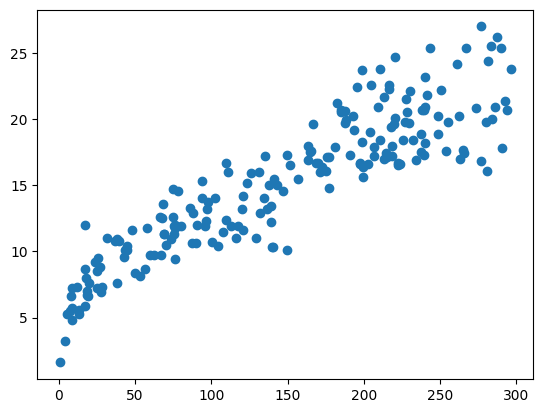

In [4]:
fig, ax = plt.subplots()
ax.scatter(x=data['TV'], y=data['Sales'])

In [7]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
len(y)

200

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.30)
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = lin.predict(X_test)
r2_score(y_test, y_pred)


0.8692052734910128

In [11]:
lin.coef_

array([0.05365017, 0.11073062, 0.00203697])

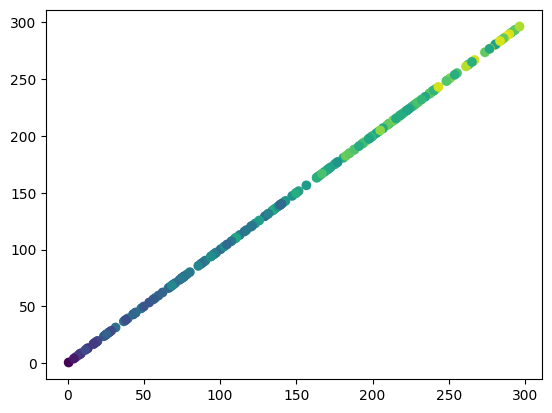

In [14]:
fig, ax = plt.subplots()
ax.scatter(x=X['TV'], y=X['TV'], c=data['Sales'])

Q2

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [2]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [3]:
import numpy as np

features = np.array([[3,4,5,2], [5,4,2,2], [7,1,2,4], [2,4,8,1]])
predictions = dt.predict(features)
print(predictions)

[2 0 0 2]


In [4]:
from sklearn.metrics import accuracy_score

y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


Q3

In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


In [9]:
diabetes_df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
diabetes_df.describe(include = 'all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
remove_null = ['Glucose', 'BloodPressure','SkinThickness','BMI','Insulin']

for col in remove_null:
    diabetes_df[col] = diabetes_df[col].replace(0,np.NaN)
    mean = int(diabetes_df[col].mean(skipna=True))
    diabetes_df[col] = diabetes_df[col].replace(np.NaN,mean)

In [12]:
X = diabetes_df.iloc[:,0:8]
Y = diabetes_df.iloc[:,8]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

In [13]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [14]:
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
classifier.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [15]:
Y_pred = classifier.predict(X_test)
Y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [16]:
confusion_matrix = confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)

[[80 19]
 [20 35]]


In [17]:
print("f1 score and accuracy score: ",f1_score(Y_test,Y_pred), accuracy_score(Y_test,Y_pred))

f1 score and accuracy score:  0.6422018348623852 0.7467532467532467
